Movie Box Office Revenue vs Marketing Spend
A film studio wants to estimate box office revenue based on marketing spend. They have data from previous movies.
 	Task: Predict revenue for a film with a ₹10 crore marketing budget. Also, discuss whether only marketing spend is enough to explain success.


In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "regression_datasets_large.xlsx - Movie_Revenue.csv"
data = pd.read_csv(file_path)

data.head()

,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr
0,1,33.106857,7,Drama,14.890417,2248,29731,5.006819,High,108.275482
1,2,27.992011,4,Comedy,73.812188,1131,44922,5.293104,High,81.992953
2,3,5.262351,8,Comedy,59.946757,944,45848,4.823532,Low,11.274974
3,4,21.014207,7,Horror,31.045263,186,4390,5.651075,Low,83.316156
4,5,19.261737,5,Drama,12.544840,2190,6997,7.783758,Low,160.426849


In [50]:

data.groupby(['Marketing_Spend_Cr', 'Box_Office_Revenue_Cr']).size().reset_index()

,Marketing_Spend_Cr,Box_Office_Revenue_Cr,0
0,1.312908,41.984022,1
1,1.478772,175.099408,1
2,1.569406,11.076505,1
3,2.084054,17.216497,1
4,2.204759,97.108621,1
...,...,...,...
195,48.700959,182.319134,1
196,49.078123,77.675273,1
197,49.214905,122.367284,1
198,49.346467,114.334764,1


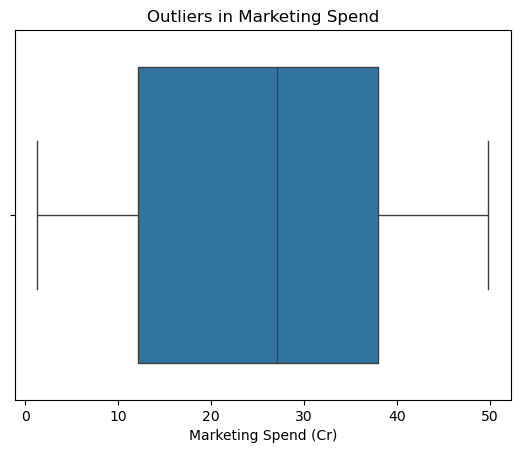

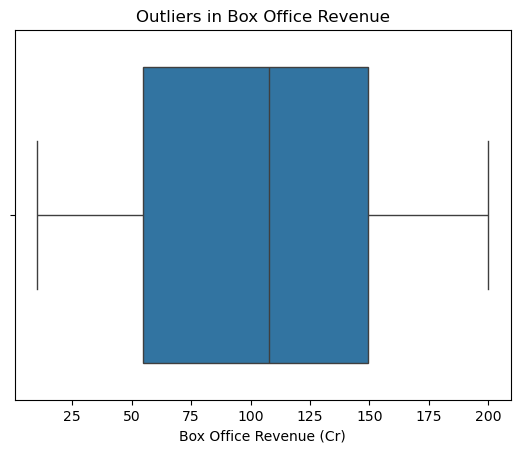

In [51]:
#plot outliers
sns.boxplot(x=data["Marketing_Spend_Cr"])
plt.title("Outliers in Marketing Spend")
plt.xlabel("Marketing Spend (Cr)")
plt.show()

sns.boxplot(x=data["Box_Office_Revenue_Cr"])
plt.title("Outliers in Box Office Revenue")
plt.xlabel("Box Office Revenue (Cr)")
plt.show()

In [52]:
X = data[["Marketing_Spend_Cr"]]
y = data["Box_Office_Revenue_Cr"]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [53]:
predicted_revenue = model.predict(np.array([[10]]))

r2 = model.score(X, y)

print(f"Predicted revenue for ₹10 crore spend: {predicted_revenue}")
print(f"R^2 value: {r2}")

Predicted revenue for ₹10 crore spend: [97.6450598]
R^2 value: 0.01116151211842853


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
r2 = model.score(X, y)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f'R^2: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


R^2: 0.0112
MAE: 47.0234
MSE: 3007.2857
RMSE: 54.8387


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


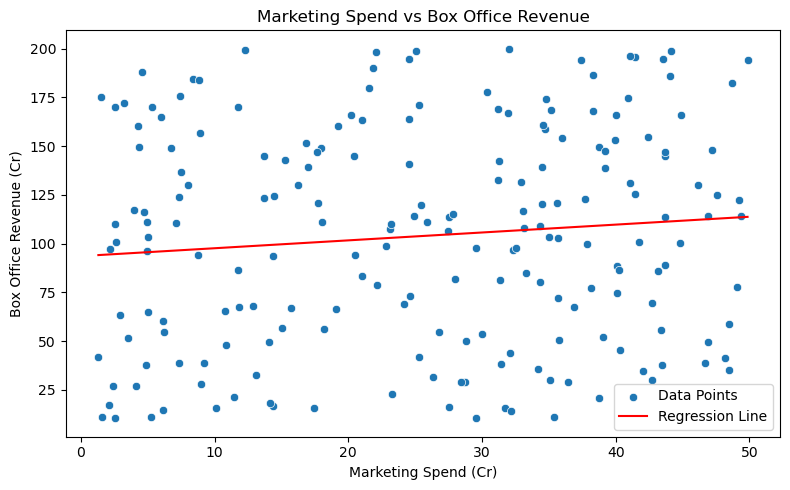

In [55]:
x_range = np.linspace(data['Marketing_Spend_Cr'].min(), data['Marketing_Spend_Cr'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Marketing_Spend_Cr', y='Box_Office_Revenue_Cr', data=data, label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Marketing Spend (Cr)')
plt.ylabel('Box Office Revenue (Cr)')
plt.title('Marketing Spend vs Box Office Revenue')
plt.legend()
plt.tight_layout()
plt.show()